In [2]:
## Importing the required libraries for performing decision algo on company dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier # to build the c5.0 decision tree algo
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
company = pd.read_csv("C:/Users/Anusha/Desktop/ExcelRProjects/dataset/Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Performing Initial EDA

In [4]:
company[company.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


#### No duplicated values existing

In [6]:
##Checking for maximum and minimum values to decide what will be the cut off point
a=company["Sales"].min()
b=company["Sales"].max()
print("min sales value:",a,"max Sales Value:",b)
company["Sales"].value_counts()

min sales value: 0.0 max Sales Value: 16.27


7.80     4
6.67     3
8.77     3
9.32     3
5.87     3
        ..
8.89     1
13.39    1
9.14     1
5.07     1
9.50     1
Name: Sales, Length: 336, dtype: int64

<AxesSubplot:>

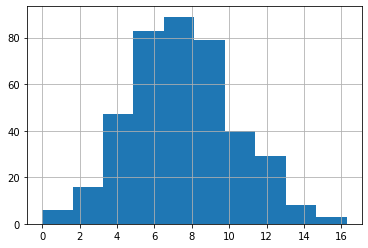

In [7]:
company["Sales"].hist()

In [8]:
##Knowing the middle value by looking into median so that i find the middle value to check to divide data into two levels.
np.median(company["Sales"])

7.49

###### Converting it Sales variable into categorical data i.e we have bucketed the data into two levels.
###### Less than 7.5 and greater than 7.5 as high and low sales

In [9]:
company1=company.copy()
company1.head(1)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.5,138,73,11,276,120,Bad,42,17,Yes,Yes


In [10]:
#company["sales"]= "<=7.49"
company1.loc[company1["Sales"]>=7.49,"sales"]="high"
company1.loc[company1["Sales"]<7.49,"sales"]="low"

In [11]:
company1["sales"].unique()

array(['high', 'low'], dtype=object)

In [12]:
company1["sales"].value_counts()

high    201
low     199
Name: sales, dtype: int64

In [13]:
company1.head(1)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.5,138,73,11,276,120,Bad,42,17,Yes,Yes,high


In [14]:
##Dropping Sales column from the data 
company1.drop(["Sales"],axis=1,inplace = True)

In [15]:
company1.head(1)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,high


In [16]:
##Checking the data type
company1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    400 non-null    int64 
 1   Income       400 non-null    int64 
 2   Advertising  400 non-null    int64 
 3   Population   400 non-null    int64 
 4   Price        400 non-null    int64 
 5   ShelveLoc    400 non-null    object
 6   Age          400 non-null    int64 
 7   Education    400 non-null    int64 
 8   Urban        400 non-null    object
 9   US           400 non-null    object
 10  sales        400 non-null    object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


In [17]:
##As, the fit does not consider the String data, we need to encode the data.
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
for column_name in company1.columns:
    if company1[column_name].dtype == object:
        company1[column_name] = le.fit_transform(company1[column_name])
    else:
        pass

In [18]:
features = company1.iloc[:,0:10] 
features.head(1)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1


In [19]:
labels = company1.iloc[:,10]
labels.head(1)

0    0
Name: sales, dtype: int32

##### Encoded values 
###### High = 0,low =1

In [20]:
##Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.3,stratify = labels)

In [21]:
y_train.value_counts()

0    141
1    139
Name: sales, dtype: int64

In [22]:
y_test.value_counts()

1    60
0    60
Name: sales, dtype: int64

### Building the model using Decision Tree Classifier C 5.0

In [23]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [24]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

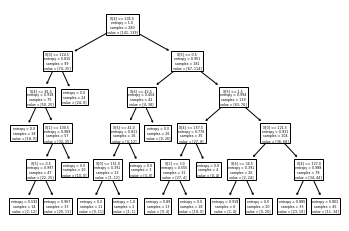

In [25]:
#PLot the decision tree
tree.plot_tree(model);


In [26]:
## Collecting the column names
colnames = list(company1.columns)
predictors = colnames[0:10]
target = colnames[10]

In [27]:
predictors

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [28]:
target

'sales'

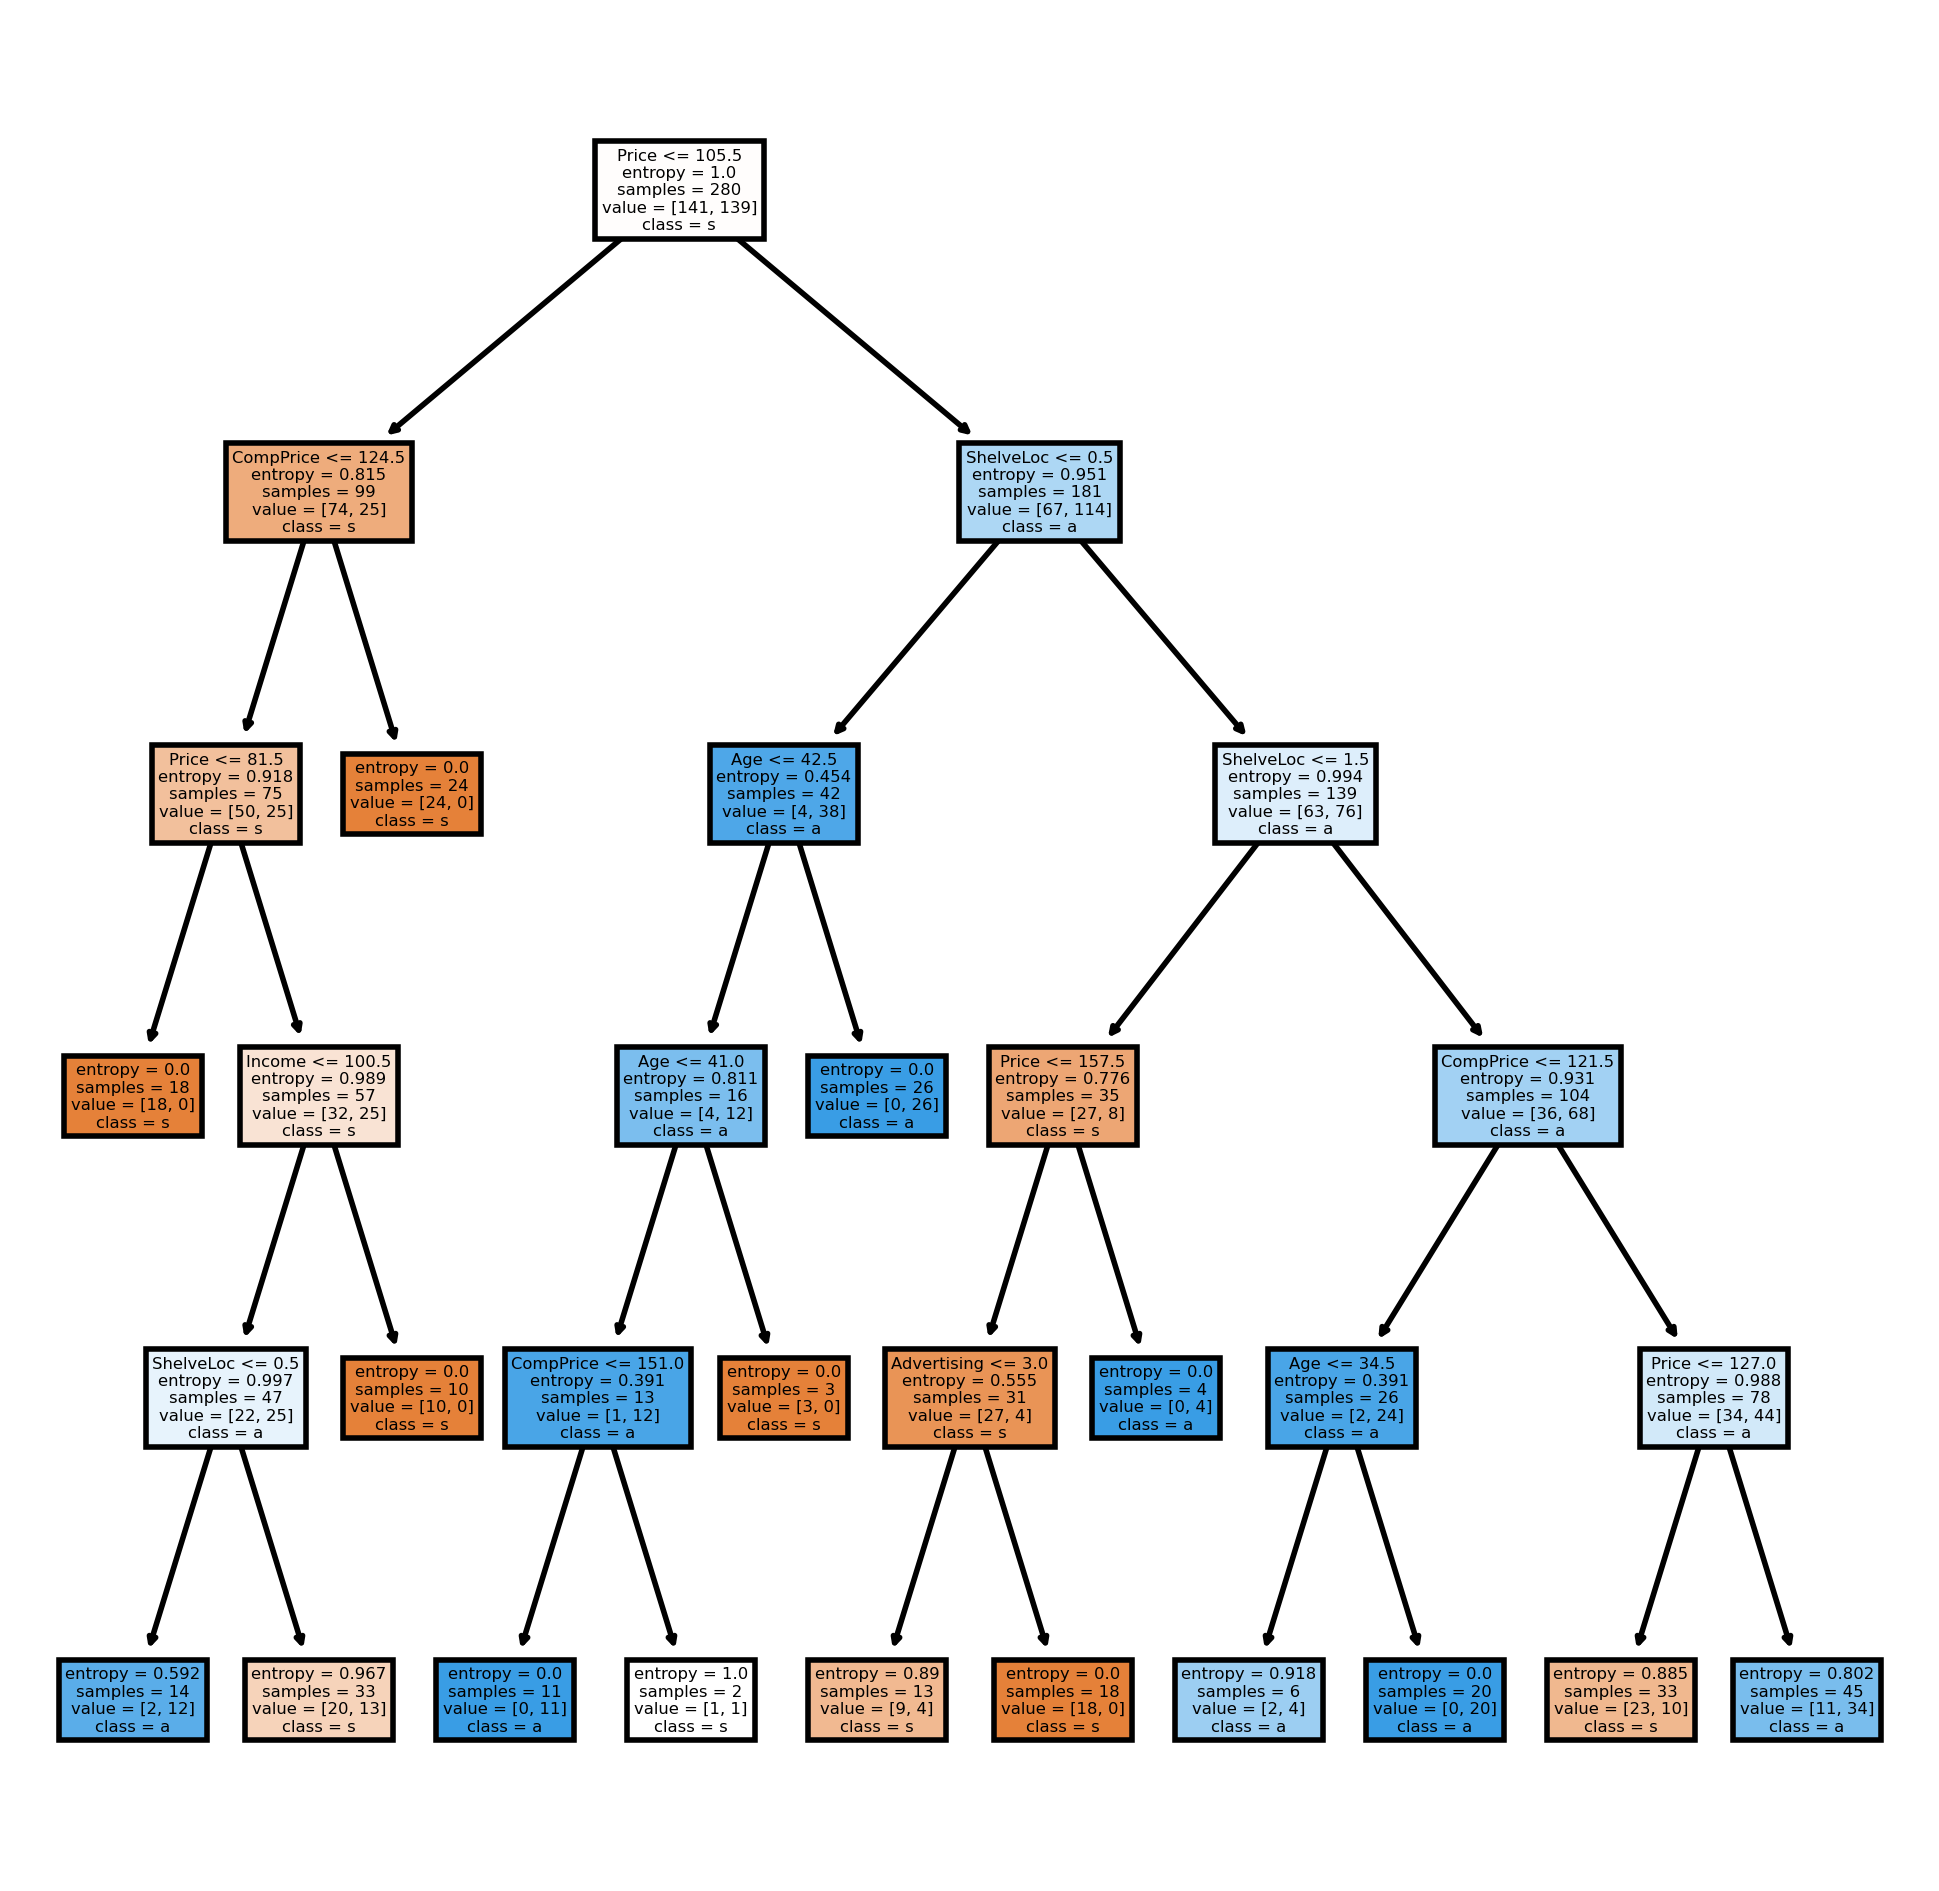

In [29]:
fn=predictors
cn=target
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=400)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [30]:
##prediction on Training data
pred_train = pd.DataFrame(model.predict(x_train))

In [31]:
##Finding Accuracy for train data
acc_train = accuracy_score(y_train,pred_train)
print(acc_train)

0.8464285714285714


In [32]:
## Confusion matrix
confusion_mat = pd.DataFrame(confusion_matrix(y_train,pred_train,))
confusion_mat

,0,1
0,126,15
1,28,111


In [33]:
##prediction on test data
pred_test = pd.DataFrame(model.predict(x_test))

In [34]:
##Accuracy on test data
acc_test = accuracy_score(y_test,pred_test)
acc_test

0.7833333333333333

In [60]:
##Confusion matrix
confusion_test = pd.DataFrame(confusion_matrix(y_test,pred_test))
confusion_test

,0,1
0,47,13
1,16,44


### Building Decision Tree Classifier (CART) using Gini Criteria

In [35]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini')

In [36]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier()

In [37]:
#Prediction and computing the accuracy
preds=model_gini.predict(x_train)
np.mean(preds==y_train)

1.0

In [39]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

0.7916666666666666

##### From the above predictions of the both models C5.0 and CART Classifier, we can conclude both are performing almost similar for the given dataset